# Находим лица в изображениях каскадом Хаара

Задача *нахождения лиц на изображении*, то есть выделения областей, содержащих лицо человека, проще, чем задача распознавания лиц. Она успешно решается: все наверняка видели прямоугольники вокруг лиц в видоискателе фотоаппарата или на экране камеры смартфона. Существуют различные методы решения этой задачи, наиболее быстрый из них — каскады Хаара, или метод Виолы–Джонса:

* [Метод Виолы-Джонса как основа для распознавания лиц](https://habr.com/post/133826/).
* [Rapid Object Detection using a Boosted Cascade of Simple Features](https://www.cs.cmu.edu/~efros/courses/LBMV07/Papers/viola-cvpr-01.pdf) (оригинальная статья). 
* [An Analysis of the Viola-Jones Face Detection Algorithm](http://www.ipol.im/pub/art/2014/104/).

В OpenCV имеется реализация каскадов Хаара, и даже имеются предобученные каскады для обнаружения лиц, правда либо в анфас (`frontal`) либо в профиль (`lefteye`, `righteye`).

Если прошлое задание выполнено, то в папке `../faces` у вас есть черно-белые изображения `0001.JPG`, `0002.JPG`, ... Зачитав изображение из файла в массив NumPy, можно обнаружить на нем лица. Для этого следует воспользоваться функцией `cv2.CascadeClassifier(filename)`, которой передается имя XML-файла, содержащего готовый каскад. Полученный из этой функции классификатор является объектом, который имеет метод `detectMultiScale()`, куда и передается массив изображения. Результатом вызова является список четверок координат, задающих верхние левые углы, ширину и высоту изображения  

ВНИМАНИЕ! бинарный дистрибутив для Windows с сайта https://www.lfd.uci.edu/~gohlke/pythonlibs/ на момент написания этой тетрадки (ноябрь 2018) **не содержит** папки с классификаторами. Поэтому классификаторы из папки data скопированы в папку с этой тетрадкой. 

Ниже приведен пример обнаружения лиц на одном изображении. Прямоугольники с найденными лицами обводятся зеленым контуром. Исходное изображение цветное, поэтому оно сначала преобразуется в чб изображение `bw`.

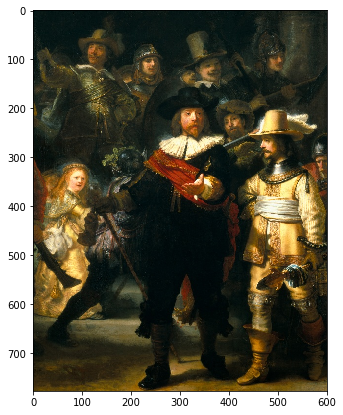

In [1]:
import cv2, os
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=(15,7)

img = cv2.imread('rembrandt.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

Найдено лиц:  3


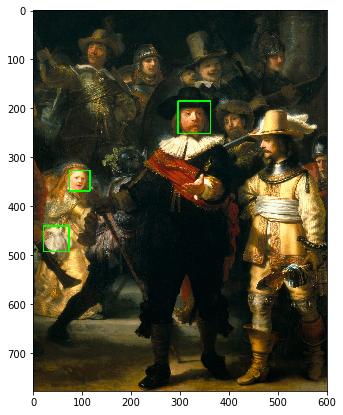

In [2]:
import cv2, os, shutil, glob

# загружаем готовый каскад из файла, на Windows - из текущей папки
CASCADE_DIR = '.' if os.name == 'windows' else cv2.__path__[0] + '/data/' 
faceCascade = cv2.CascadeClassifier(os.path.join(CASCADE_DIR+'haarcascade_frontalface_default.xml'))

# зачитываем файл и готовим черно-белую версию изображения
img = cv2.imread('rembrandt.jpg')
bw = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# находим лица разных размеров
faces = faceCascade.detectMultiScale(bw, scaleFactor=1.1, minNeighbors=3, minSize=(30,30), maxSize=(80,80))
print('Найдено лиц: ', len(faces))   

# рисуем зеленыепрямоугольники толищины 2 пикселя вокруг каждого найденного лица
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0), 2)


plt.rcParams['figure.figsize']=(15,7)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

Как видим, есть ошибочно обнаруженные фрагменты. Мы не будем брать картинки с несколькими найденными рамками или со слишком маленькими лицами. Обнаруженные регионы, по крайней мере для каскада из файла `haarcascade_frontalface_default.xml`, являются квадратами.

## Задание 1
Пройдитесь по изображениям в папке `../faces/` и для тех из них, где обнаружено ровно одно достаточно крупное лицо, 

1) преобразуйте в ч/б 

2) отмасштабируйте к размеру 128×128, и 

3) сохраните в папку `../classes` с сохранением имени. 

Поскольку люди садились перед камерой по очереди, можно будет потом рассортировать их вручную по подпапкам для обучения.

## Подсказки

Для перебора файлов годится метод `glob.glob`. Вот пример получения списка файлов из папки `../faces`:

In [3]:
import glob
glob.glob('faces/*')

[]

Для изменения размера подходит метод `cv2.resize`:

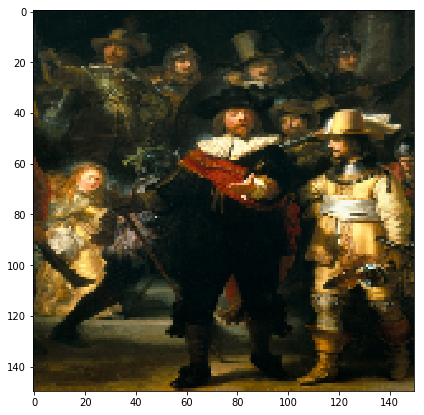

In [4]:
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('rembrandt.jpg')

img2 = cv2.resize(img, (150,150))

plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))
plt.show()

# Задание 2
Поэкспериментируйте с другими каскадами, особенно с обнаружением лица в профиль. Запишите ваши выводы.